# **INSTALL OPENDATASETS**

In [123]:
pip install opendatasets

IMPORT OPENDATASETS


In [124]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/abhijitdahatonde/swiggy-restuarant-dataset")


Skipping, found downloaded files in "./swiggy-restuarant-dataset" (use force=True to force download)


# **DATA PREVIEW**

In [125]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/swiggy-restuarant-dataset/swiggy.csv")
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [126]:
print(df.columns)


Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')


In [127]:
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nFirst 5 rows:\n", df.head())


Shape of dataset: (8680, 10)

Column names:
 Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

First 5 rows:
     ID         Area       City         Restaurant  Price  Avg ratings  \
0  211  Koramangala  Bangalore        Tandoor Hut  300.0          4.4   
1  221  Koramangala  Bangalore      Tunday Kababi  300.0          4.1   
2  246    Jogupalya  Bangalore            Kim Lee  650.0          4.4   
3  248  Indiranagar  Bangalore  New Punjabi Hotel  250.0          3.9   
4  249  Indiranagar  Bangalore                Nh8  350.0          4.0   

   Total ratings                                          Food type  \
0            100          Biryani,Chinese,North Indian,South Indian   
1            100                                   Mughlai,Lucknowi   
2            100                                            Chinese   
3            500               North Indian,Punjabi,Tandoor,C



# **DATA CLEANING**

In [128]:
# Check how many duplicate rows exist
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df = df.drop_duplicates()

# Confirm the new shape
print("New shape after removing duplicates:", df.shape)


Number of duplicate rows: 0
New shape after removing duplicates: (8680, 10)


In [129]:
# Check for missing/null values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64


In [130]:
# Check again to see missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Drop columns with >50% missing values (optional step, based on threshold)
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])  # Most frequent value
    else:
        df[col] = df[col].fillna(df[col].median())  # Median for numeric

print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64
Missing values after cleaning:
ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64


# **FEATURE SELECTION AND ENGINEERING**

In [131]:
# Price Category
def price_category(price):
    if price < 200:
        return 'Low'
    elif 200 <= price < 500:
        return 'Medium'
    else:
        return 'High'

df['Price Category'] = df['Price'].apply(price_category)

# Delivery Speed Category
def delivery_speed(time):
    if time <= 45:
        return 'Fast'
    elif time <= 60:
        return 'Average'
    else:
        return 'Slow'

df['Delivery Speed'] = df['Delivery time'].apply(delivery_speed)

# Food Type Count
df['Num Food Types'] = df['Food type'].apply(lambda x: len(str(x).split(',')))


# **DATA INTEGRITY AND CONSISTENCY**

In [132]:
# Remove duplicates
df = df.drop_duplicates()

# Standardize object columns
text_columns = df.select_dtypes(include='object').columns
for col in text_columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Validate column formats (e.g. ratings should be within 0-5)
df = df[(df['Avg ratings'] >= 0) & (df['Avg ratings'] <= 5)]



# **SUMMARY STATISTICS**

In [133]:
# Summary stats for numerical columns
print("\n--- Summary Statistics ---")
print(df.describe())

# Group-wise average rating by city (make sure column name is correct)
print("\nAverage rating by city:")
print(df.groupby('City')['Avg ratings'].mean().sort_values(ascending=False))

# Average delivery time by area
print("\nAverage delivery time by area:")
print(df.groupby('Area')['Delivery time'].mean().sort_values())

# Most expensive restaurants
top_expensive = df.sort_values(by='Price', ascending=False).head(5)
print("\nTop 5 most expensive restaurants:")
print(top_expensive[['Restaurant', 'City', 'Price']])



--- Summary Statistics ---
                  ID        Price  Avg ratings  Total ratings  Delivery time  \
count    8680.000000  8680.000000  8680.000000    8680.000000    8680.000000   
mean   244812.071429   348.444470     3.655104     156.634793      53.967051   
std    158671.617188   230.940074     0.647629     391.448014      14.292335   
min       211.000000     0.000000     2.000000      20.000000      20.000000   
25%     72664.000000   200.000000     2.900000      50.000000      44.000000   
50%    283442.000000   300.000000     3.900000      80.000000      53.000000   
75%    393425.250000   400.000000     4.200000     100.000000      64.000000   
max    466928.000000  2500.000000     5.000000   10000.000000     109.000000   

       Num Food Types  
count     8680.000000  
mean         2.721544  
std          2.111425  
min          1.000000  
25%          1.000000  
50%          2.000000  
75%          3.000000  
max         23.000000  

Average rating by city:
City
chenn

# **IDENTIFYING ANAMOLIES AND PATTERNS**

In [134]:
from collections import Counter

# Break down all food types into a flat list
all_foods = df['Food type'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
flattened_foods = [food for sublist in all_foods for food in sublist]

# Count most common food types
food_counter = Counter(flattened_foods)
print("\n🍽️ Most common food types:")
for food, count in food_counter.most_common(10):
    print(f"{food}: {count}")



🍽️ Most common food types:
chinese: 2588
north indian: 1921
indian: 1775
fast food: 1550
beverages: 1524
desserts: 1436
biryani: 1079
snacks: 1013
south indian: 857
continental: 686


In [135]:
#  Restaurants with high delivery time (> 70 mins) — could indicate delays
high_delivery = df[df['Delivery time'] > 70]
print("\n Restaurants with delivery time > 70 mins:")
print(high_delivery[['Restaurant', 'Delivery time', 'City']])



 Restaurants with delivery time > 70 mins:
                    Restaurant  Delivery time       City
19         so. the sky kitchen             90  hyderabad
34            cafe peterdonuts             71       pune
35                   karolbaug             72       pune
56             tandoori darbar             71    kolkata
58                 tero parbon             72    kolkata
...                        ...            ...        ...
8615          assr enterprises             74  hyderabad
8620           sam mankar dosa             77       pune
8627  sri lakshmi vilas hotels             73    chennai
8630  sri sai tiffins and chat             73  hyderabad
8638          sahi suraj singh             72  ahmedabad

[1255 rows x 3 columns]


In [136]:
#  Top areas with the highest number of restaurants
print("\n Top areas by number of restaurants:")
print(df['Area'].value_counts().head(5))



 Top areas by number of restaurants:
Area
rohini          257
chembur         208
kothrud         149
andheri east    135
navrangpura     132
Name: count, dtype: int64


# **HANDLING OUTLIERS**


In [137]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = len(df)
    df = df[(df[column] >= lower) & (df[column] <= upper)]
    after = len(df)
    print(f"{column}: Removed {before - after} outliers")
    return df


In [138]:
df = remove_outliers_iqr(df, 'Price')
df = remove_outliers_iqr(df, 'Delivery time')


Price: Removed 583 outliers
Delivery time: Removed 45 outliers


# **DATA VISUALIZATION**



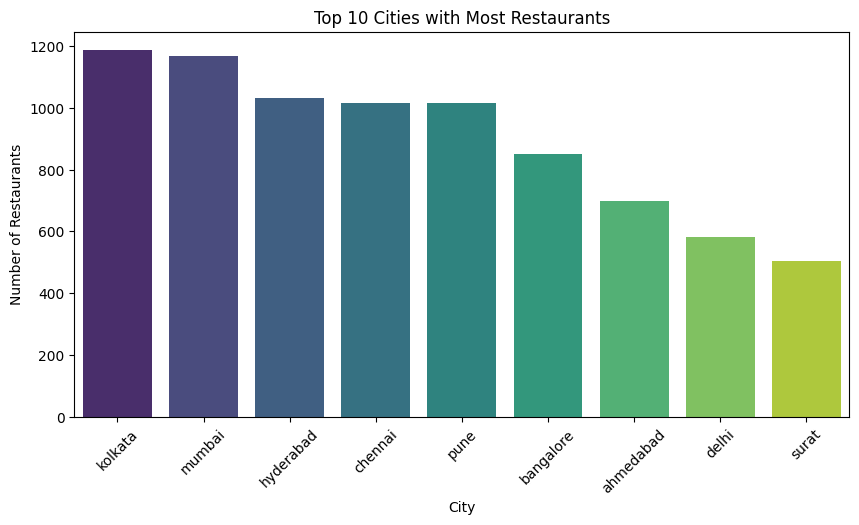

In [139]:
import matplotlib.pyplot as plt
top_cities = df['City'].value_counts().nlargest(10).reset_index()
top_cities.columns = ['City', 'Count']

plt.figure(figsize=(10, 5))
sns.barplot(data=top_cities, x='City', y='Count', hue='City', palette='viridis', legend=False)
plt.title('Top 10 Cities with Most Restaurants')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()




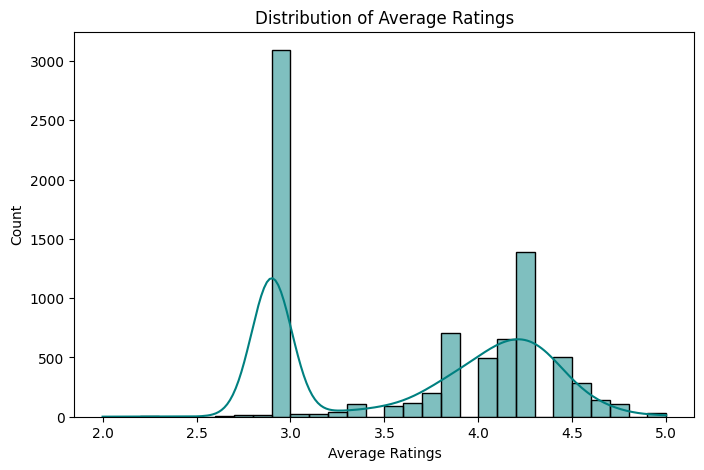

In [140]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Avg ratings', kde=True, bins=30, color='teal')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Count')
plt.show()


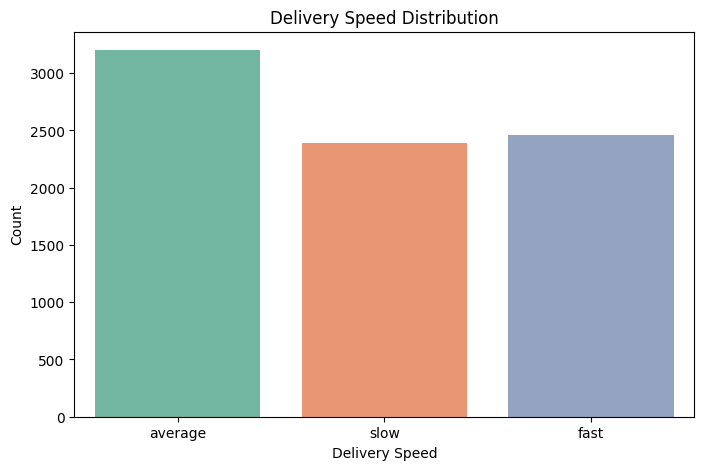

In [141]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Delivery Speed', hue='Delivery Speed', palette='Set2', legend=False)
plt.title('Delivery Speed Distribution')
plt.ylabel('Count')
plt.show()


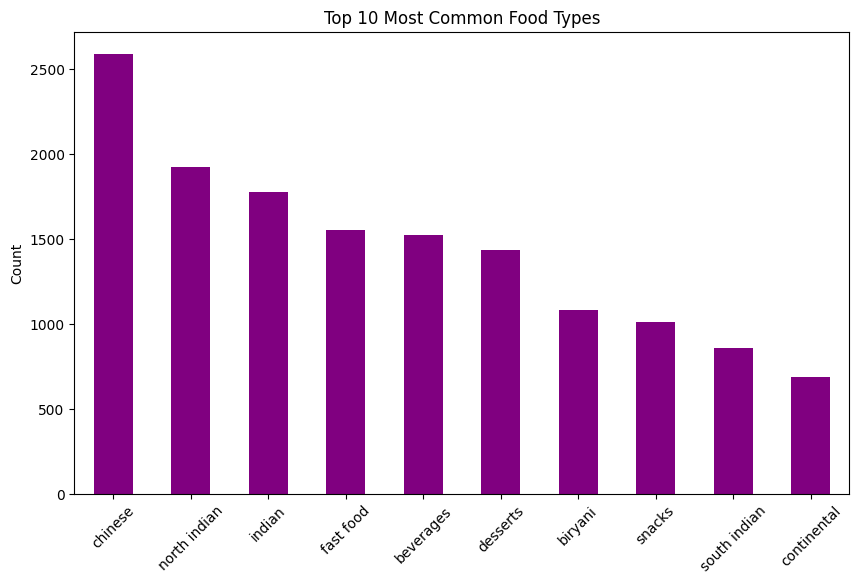

In [142]:
top_foods = pd.Series(dict(food_counter)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_foods.plot(kind='bar', color='purple')
plt.title('Top 10 Most Common Food Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


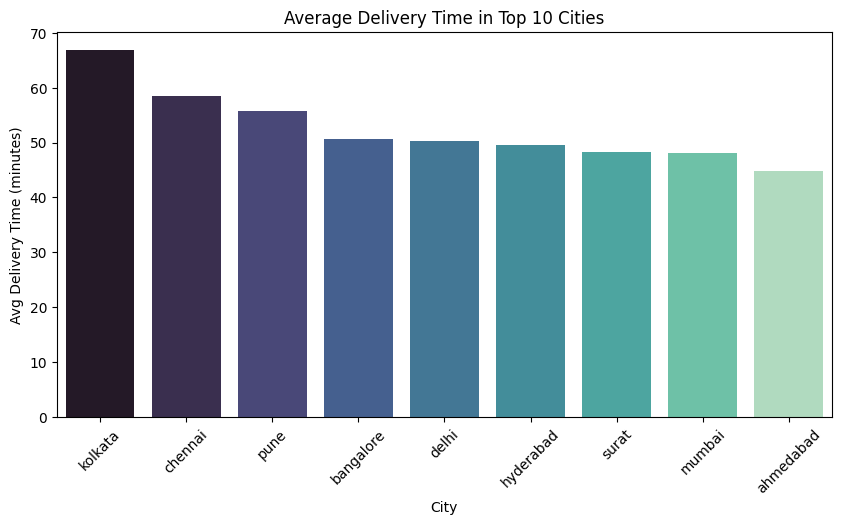

In [143]:
avg_delivery = df.groupby('City')['Delivery time'].mean().nlargest(10).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=avg_delivery, x='City', y='Delivery time', hue='City', palette='mako', legend=False)
plt.title('Average Delivery Time in Top 10 Cities')
plt.ylabel('Avg Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()
